## Players skills Rate analysis

In [154]:
from matplotlib.pyplot import GridSpec
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, sys
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_context("poster", font_scale=1.3)

import missingno as msno
import pandas_profiling

from sklearn.datasets import make_blobs
import time

In [155]:
fifa=pd.read_csv('fifa19_data.csv')

In [156]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [157]:
fifa.columns=fifa.columns.str.replace(' ','')
fifa.columns

Index(['Unnamed:0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDi

In [215]:
players_name='ID'
players_skills=fifa[['Name','LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB']]

In [295]:
def get_subgroup(dataframe, g_index, g_columns):
    """Helper function that creates a sub-table from the columns and runs a quick uniqueness test."""
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print("Warning: you probably assumed this had all unique values but it doesn't.")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})

In [296]:
players = get_subgroup(fifa, players_name, players_skills)
pravin=players.drop(['Name'],axis=1)
pravin=pravin.dropna()

,Name,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,Luis García,66+2,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2
41,Iniesta,74+3,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3
80,E. Belözoğlu,67+2,67+2,67+2,72+2,72+2,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2
164,G. Pinzi,63+2,63+2,63+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2
657,D. Vaughan,59+2,59+2,59+2,59+2,60+2,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2


In [232]:
pravin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 16 to 246620
Data columns (total 26 columns):
LS     16122 non-null object
ST     16122 non-null object
RS     16122 non-null object
LW     16122 non-null object
LF     16122 non-null object
CF     16122 non-null object
RF     16122 non-null object
RW     16122 non-null object
LAM    16122 non-null object
CAM    16122 non-null object
RAM    16122 non-null object
LM     16122 non-null object
LCM    16122 non-null object
CM     16122 non-null object
RCM    16122 non-null object
RM     16122 non-null object
LWB    16122 non-null object
LDM    16122 non-null object
CDM    16122 non-null object
RDM    16122 non-null object
RWB    16122 non-null object
LB     16122 non-null object
LCB    16122 non-null object
CB     16122 non-null object
RCB    16122 non-null object
RB     16122 non-null object
dtypes: object(26)
memory usage: 3.3+ MB


In [161]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 16 to 246620
Data columns (total 27 columns):
Name    18207 non-null object
LS      16122 non-null object
ST      16122 non-null object
RS      16122 non-null object
LW      16122 non-null object
LF      16122 non-null object
CF      16122 non-null object
RF      16122 non-null object
RW      16122 non-null object
LAM     16122 non-null object
CAM     16122 non-null object
RAM     16122 non-null object
LM      16122 non-null object
LCM     16122 non-null object
CM      16122 non-null object
RCM     16122 non-null object
RM      16122 non-null object
LWB     16122 non-null object
LDM     16122 non-null object
CDM     16122 non-null object
RDM     16122 non-null object
RWB     16122 non-null object
LB      16122 non-null object
LCB     16122 non-null object
CB      16122 non-null object
RCB     16122 non-null object
RB      16122 non-null object
dtypes: object(27)
memory usage: 3.9+ MB


In [162]:
df_players=players.dropna()

In [163]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16122 entries, 16 to 246620
Data columns (total 27 columns):
Name    16122 non-null object
LS      16122 non-null object
ST      16122 non-null object
RS      16122 non-null object
LW      16122 non-null object
LF      16122 non-null object
CF      16122 non-null object
RF      16122 non-null object
RW      16122 non-null object
LAM     16122 non-null object
CAM     16122 non-null object
RAM     16122 non-null object
LM      16122 non-null object
LCM     16122 non-null object
CM      16122 non-null object
RCM     16122 non-null object
RM      16122 non-null object
LWB     16122 non-null object
LDM     16122 non-null object
CDM     16122 non-null object
RDM     16122 non-null object
RWB     16122 non-null object
LB      16122 non-null object
LCB     16122 non-null object
CB      16122 non-null object
RCB     16122 non-null object
RB      16122 non-null object
dtypes: object(27)
memory usage: 3.4+ MB


In [164]:
def save_subgroup(dataframe, g_index, subgroup_name, prefix='players_'):
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv.gz"])
    dataframe.to_csv(save_subgroup_filename, compression='gzip', encoding='UTF-8')
    test_df = pd.read_csv(save_subgroup_filename, compression='gzip', index_col=g_index, encoding='UTF-8')
    # Test that we recover what we send in
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [165]:
save_subgroup(df_players, players_name, "skills")

Test-passed: we recover the equivalent subgroup dataframe.


In [176]:
play=df_players.drop(['Name'],axis=1)

In [177]:
play.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,First Name,Last Name
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,68,68,68,69,70,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2,68,2
41,77,77,77,85,84,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3,81,3
80,69,69,69,74,74,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2,72,2
164,65,65,65,66,66,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2,64,2
657,61,61,61,61,62,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2,60,2


In [166]:
new.isnull().sum()

0    0
1    0
dtype: int64

In [167]:
new = df_players['LS'].str.split("+", n = 1, expand = True)
df_players["First Name"]= new[0].astype('int64', copy=False) 
  
# making separate last name column from new data frame 
df_players["Last Name"]= new[1].astype('int64', copy=False) 
  
# # Dropping old Name columns 
# df_players.drop(columns =["LS"], inplace = True) 
 
# # df display 
df_players["LS"]=df_players["First Name"]+df_players["Last Name"]
df_players.drop(["First Name","Last Name"],axis=1)


,Name,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,Luis García,68,66+2,66+2,67+2,68+2,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2
41,Iniesta,77,74+3,74+3,82+3,81+3,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3
80,E. Belözoğlu,69,67+2,67+2,72+2,72+2,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2
164,G. Pinzi,65,63+2,63+2,64+2,64+2,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2
657,D. Vaughan,61,59+2,59+2,59+2,60+2,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2
768,Felipe,50,48+2,48+2,44+2,47+2,47+2,47+2,44+2,48+2,48+2,48+2,47+2,56+2,56+2,56+2,47+2,61+2,68+2,68+2,68+2,61+2,64+2,73+2,73+2,73+2,64+2
2335,A. Wilbraham,64,62+2,62+2,56+2,59+2,59+2,59+2,56+2,59+2,59+2,59+2,55+2,54+2,54+2,54+2,55+2,40+2,45+2,45+2,45+2,40+2,39+2,45+2,45+2,45+2,39+2
2702,K. Ellison,63,61+2,61+2,58+2,59+2,59+2,59+2,58+2,58+2,58+2,58+2,57+2,56+2,56+2,56+2,57+2,50+2,52+2,52+2,52+2,50+2,48+2,52+2,52+2,52+2,48+2
3281,Tarantini,72,70+2,70+2,68+2,71+2,71+2,71+2,68+2,72+2,72+2,72+2,68+2,73+2,73+2,73+2,68+2,67+2,72+2,72+2,72+2,67+2,67+2,72+2,72+2,72+2,67+2


In [171]:
new = df_players['LF'].str.split("+", n = 1, expand = True)
df_players["First Name"]= new[0].astype('int64', copy=False) 
  
# making separate last name column from new data frame 
df_players["Last Name"]= new[1].astype('int64', copy=False) 
  
# # Dropping old Name columns 
# df_players.drop(columns =["LS"], inplace = True) 
 
# # df display 
df_players["LF"]=df_players["First Name"]+df_players["Last Name"]
df_players.drop(["First Name","Last Name"],axis=1)



,Name,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,Luis García,68,68,68,69,70,68+2,68+2,67+2,69+2,69+2,69+2,67+2,69+2,69+2,69+2,67+2,62+2,65+2,65+2,65+2,62+2,59+2,59+2,59+2,59+2,59+2
41,Iniesta,77,77,77,85,84,81+3,81+3,82+3,85+3,85+3,85+3,82+3,83+3,83+3,83+3,82+3,71+3,73+3,73+3,73+3,71+3,68+3,63+3,63+3,63+3,68+3
80,E. Belözoğlu,69,69,69,74,74,72+2,72+2,72+2,76+2,76+2,76+2,73+2,78+2,78+2,78+2,73+2,68+2,74+2,74+2,74+2,68+2,65+2,66+2,66+2,66+2,65+2
164,G. Pinzi,65,65,65,66,66,64+2,64+2,64+2,65+2,65+2,65+2,64+2,66+2,66+2,66+2,64+2,68+2,69+2,69+2,69+2,68+2,67+2,69+2,69+2,69+2,67+2
657,D. Vaughan,61,61,61,61,62,60+2,60+2,59+2,62+2,62+2,62+2,59+2,65+2,65+2,65+2,59+2,60+2,65+2,65+2,65+2,60+2,59+2,62+2,62+2,62+2,59+2
768,Felipe,50,50,50,46,49,47+2,47+2,44+2,48+2,48+2,48+2,47+2,56+2,56+2,56+2,47+2,61+2,68+2,68+2,68+2,61+2,64+2,73+2,73+2,73+2,64+2
2335,A. Wilbraham,64,64,64,58,61,59+2,59+2,56+2,59+2,59+2,59+2,55+2,54+2,54+2,54+2,55+2,40+2,45+2,45+2,45+2,40+2,39+2,45+2,45+2,45+2,39+2
2702,K. Ellison,63,63,63,60,61,59+2,59+2,58+2,58+2,58+2,58+2,57+2,56+2,56+2,56+2,57+2,50+2,52+2,52+2,52+2,50+2,48+2,52+2,52+2,52+2,48+2
3281,Tarantini,72,72,72,70,73,71+2,71+2,68+2,72+2,72+2,72+2,68+2,73+2,73+2,73+2,68+2,67+2,72+2,72+2,72+2,67+2,67+2,72+2,72+2,72+2,67+2


In [362]:
players = get_subgroup(fifa, players_name, players_skills)

In [424]:

dummy_dataset=players
pravin=dummy_dataset.drop(['Name'],axis=1)
pravin=pravin.dropna()
def function_new(dataframe):
#     for x in dataframe:
    for x in range(0,len(dataframe.columns)):
#         print(x)
#         print(len(dataframe.columns))
        a=dataframe.columns[x]
        new = dataframe[a].str.split("+", expand = True)
        #print(new)
        dataframe["First Name"]= new[0].astype('int64', copy=False) 
    
        # making separate last name column from new data frame 
        dataframe["Last Name"]= new[1].astype('int64', copy=False) 
    
              # # Dropping old Name columns 
              # df_players.drop(columns =["LS"], inplace = True) 
    
    
        dataframe[a]=dataframe["First Name"]+dataframe["Last Name"]
        dataframe.drop(["First Name","Last Name"],axis=1)
       
    dataframe.drop(["First Name","Last Name"],axis=1)

    
    return dataframe

    

In [426]:
dataframe.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,First Name,Last Name
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
16,68,68,68,69,70,70,70,69,71,71,71,69,71,71,71,69,64,67,67,67,64,61,61,61,61,61,59,2
41,77,77,77,85,84,84,84,85,88,88,88,85,86,86,86,85,74,76,76,76,74,71,66,66,66,71,68,3
80,69,69,69,74,74,74,74,74,78,78,78,75,80,80,80,75,70,76,76,76,70,67,68,68,68,67,65,2
164,65,65,65,66,66,66,66,66,67,67,67,66,68,68,68,66,70,71,71,71,70,69,71,71,71,69,67,2
657,61,61,61,61,62,62,62,61,64,64,64,61,67,67,67,61,62,67,67,67,62,61,64,64,64,61,59,2


In [427]:
dataframe=dataframe.drop(["First Name","Last Name"],axis=1)

In [428]:
dataframe.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
16,68,68,68,69,70,70,70,69,71,71,71,69,71,71,71,69,64,67,67,67,64,61,61,61,61,61
41,77,77,77,85,84,84,84,85,88,88,88,85,86,86,86,85,74,76,76,76,74,71,66,66,66,71
80,69,69,69,74,74,74,74,74,78,78,78,75,80,80,80,75,70,76,76,76,70,67,68,68,68,67
164,65,65,65,66,66,66,66,66,67,67,67,66,68,68,68,66,70,71,71,71,70,69,71,71,71,69
657,61,61,61,61,62,62,62,61,64,64,64,61,67,67,67,61,62,67,67,67,62,61,64,64,64,61


# sns.pairplot(dataframe)

In [406]:
dataframe['LS'].corr(dataframe['ST'])

0.9999999999999998

In [429]:
dataframe.corr()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
LS,1.000000,1.000000,1.000000,0.929224,0.968419,0.968419,0.968419,0.929224,0.928841,0.928841,0.928841,0.900391,0.779434,0.779434,0.779434,0.900391,0.243615,0.151736,0.151736,0.151736,0.243615,0.100555,-0.103146,-0.103146,-0.103146,0.100555
ST,1.000000,1.000000,1.000000,0.929224,0.968419,0.968419,0.968419,0.929224,0.928841,0.928841,0.928841,0.900391,0.779434,0.779434,0.779434,0.900391,0.243615,0.151736,0.151736,0.151736,0.243615,0.100555,-0.103146,-0.103146,-0.103146,0.100555
RS,1.000000,1.000000,1.000000,0.929224,0.968419,0.968419,0.968419,0.929224,0.928841,0.928841,0.928841,0.900391,0.779434,0.779434,0.779434,0.900391,0.243615,0.151736,0.151736,0.151736,0.243615,0.100555,-0.103146,-0.103146,-0.103146,0.100555
LW,0.929224,0.929224,0.929224,1.000000,0.986620,0.986620,0.986620,1.000000,0.984069,0.984069,0.984069,0.988466,0.844130,0.844130,0.844130,0.988466,0.354110,0.201624,0.201624,0.201624,0.354110,0.186950,-0.111550,-0.111550,-0.111550,0.186950
LF,0.968419,0.968419,0.968419,0.986620,1.000000,1.000000,1.000000,0.986620,0.986623,0.986623,0.986623,0.969573,0.845874,0.845874,0.845874,0.969573,0.312417,0.192102,0.192102,0.192102,0.312417,0.151551,-0.111642,-0.111642,-0.111642,0.151551
CF,0.968419,0.968419,0.968419,0.986620,1.000000,1.000000,1.000000,0.986620,0.986623,0.986623,0.986623,0.969573,0.845874,0.845874,0.845874,0.969573,0.312417,0.192102,0.192102,0.192102,0.312417,0.151551,-0.111642,-0.111642,-0.111642,0.151551
RF,0.968419,0.968419,0.968419,0.986620,1.000000,1.000000,1.000000,0.986620,0.986623,0.986623,0.986623,0.969573,0.845874,0.845874,0.845874,0.969573,0.312417,0.192102,0.192102,0.192102,0.312417,0.151551,-0.111642,-0.111642,-0.111642,0.151551
RW,0.929224,0.929224,0.929224,1.000000,0.986620,0.986620,0.986620,1.000000,0.984069,0.984069,0.984069,0.988466,0.844130,0.844130,0.844130,0.988466,0.354110,0.201624,0.201624,0.201624,0.354110,0.186950,-0.111550,-0.111550,-0.111550,0.186950
LAM,0.928841,0.928841,0.928841,0.984069,0.986623,0.986623,0.986623,0.984069,1.000000,1.000000,1.000000,0.983223,0.902739,0.902739,0.902739,0.983223,0.395873,0.284414,0.284414,0.284414,0.395873,0.234740,-0.039227,-0.039227,-0.039227,0.234740
CAM,0.928841,0.928841,0.928841,0.984069,0.986623,0.986623,0.986623,0.984069,1.000000,1.000000,1.000000,0.983223,0.902739,0.902739,0.902739,0.983223,0.395873,0.284414,0.284414,0.284414,0.395873,0.234740,-0.039227,-0.039227,-0.039227,0.234740


In [533]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    

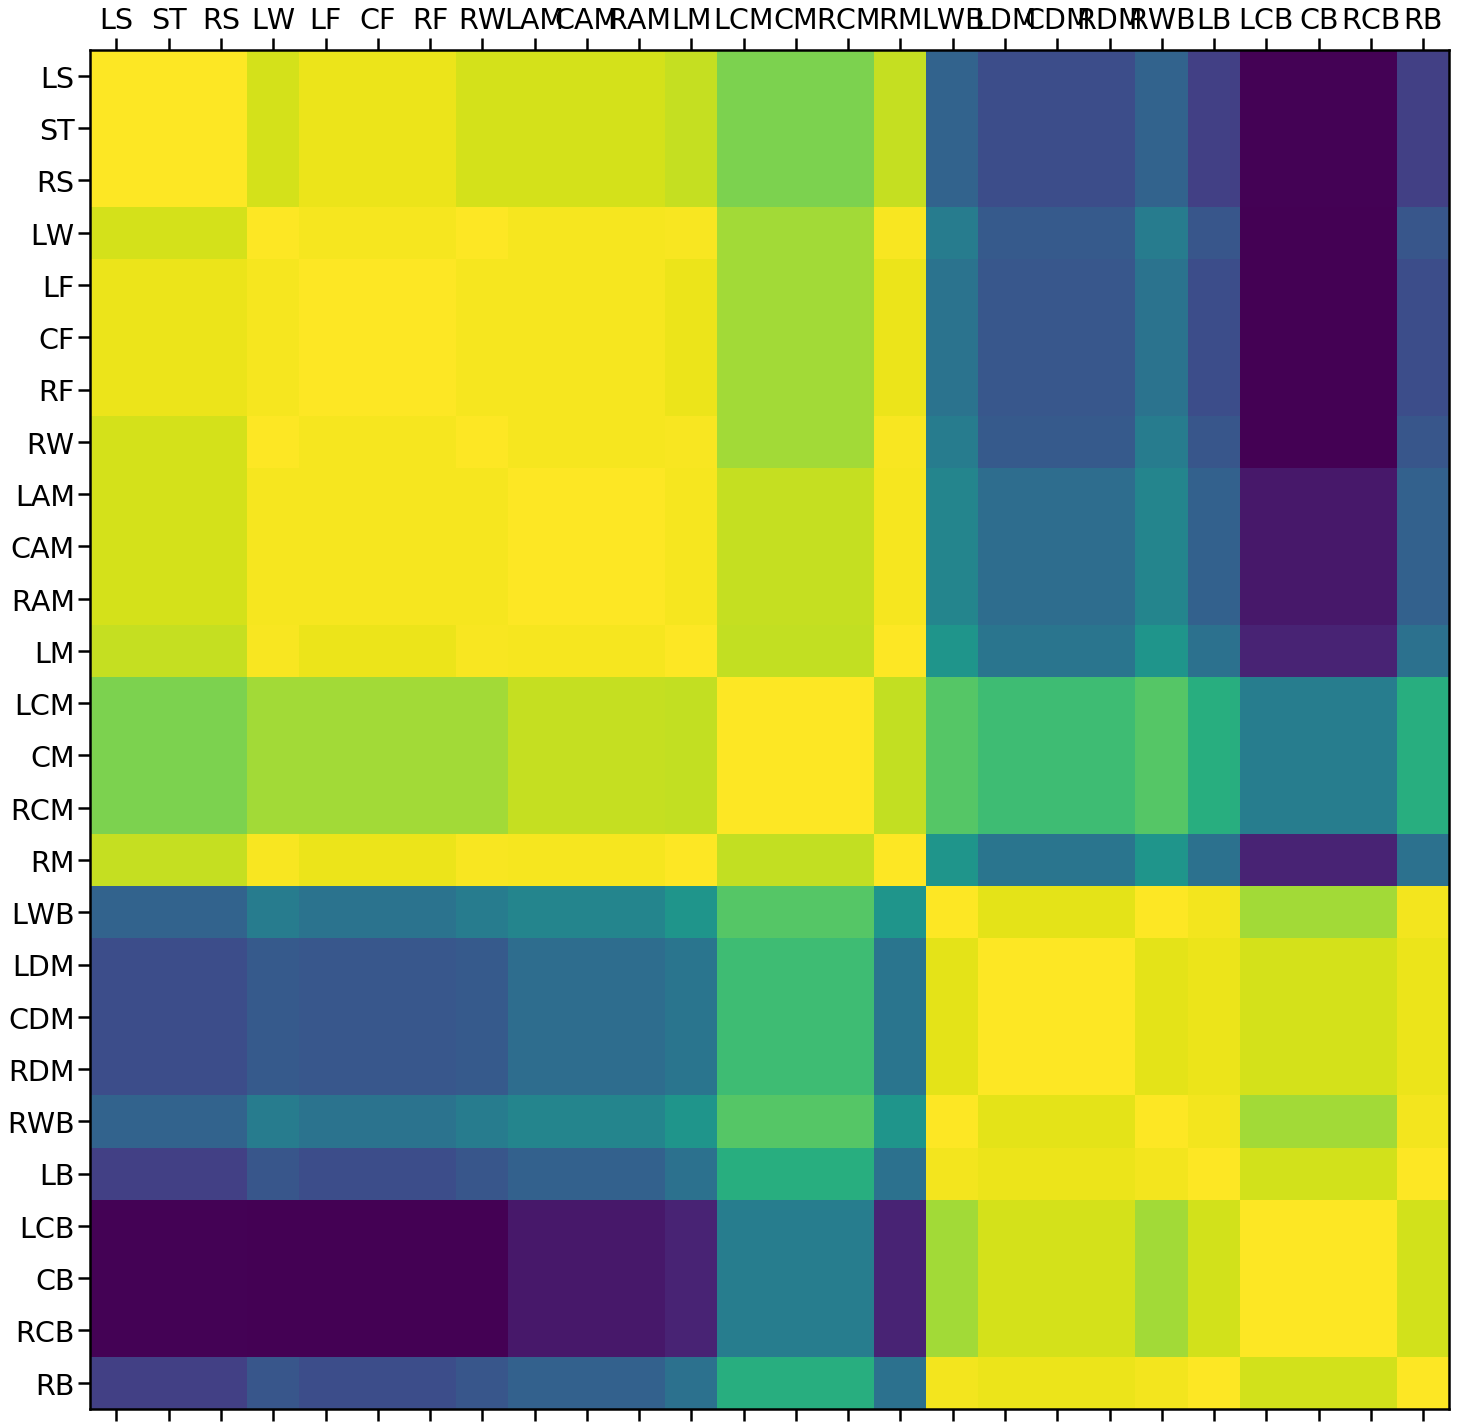

In [534]:
plot_corr(dataframe,size=25)

In [433]:
# sns.heatmap(dataframe, annot=True, fmt="d")

In [437]:
def get_corrs(df):
    col_correlations = df.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()



In [438]:
my_corrs = get_corrs(dataframe)

In [488]:
def data_cols(df):
    col=df.columns
    for x in col:
#         print(x)
        if len(x)==2:
            break
#         
        print (x)
    return
        
#     print(col)

In [489]:
data_cols(dataframe)

In [491]:
for x in dataframe.columns:
    if len(x)==3:
        
    print(x)

LS
ST
RS
LW
LF
CF
RF
RW
LAM
CAM
RAM
LM
LCM
CM
RCM
RM
LWB
LDM
CDM
RDM
RWB
LB
LCB
CB
RCB
RB


In [492]:
df1 = dataframe.iloc[:,0:2]

In [514]:
def columns_d(df,x=0,y=2):
    
    df=df.iloc[:,x:y]
    
    return df
    
    

In [517]:
z=columns_d(dataframe,x=2,y=5)

In [519]:
z.corr()

,RS,LW,LF
RS,1.000000,0.929224,0.968419
LW,0.929224,1.000000,0.986620
LF,0.968419,0.986620,1.000000


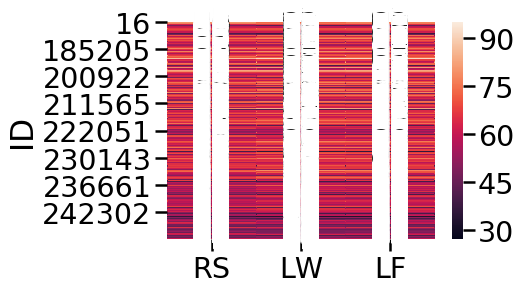

In [526]:
sns.heatmap(z, annot=True, fmt="d")